<a href="https://colab.research.google.com/github/ramjitampan/pyton_Ramzy/blob/main/tugas_kelompokM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import random
import itertools
from collections import deque
import matplotlib.pyplot as plt
import numpy as np


Mengukur algoritma untuk ukuran input n = 5...
Mengukur algoritma untuk ukuran input n = 7...
Mengukur algoritma untuk ukuran input n = 9...
Mengukur algoritma untuk ukuran input n = 11...
Mengukur algoritma untuk ukuran input besar n = 10...
Mengukur algoritma untuk ukuran input besar n = 15...
Mengukur algoritma untuk ukuran input besar n = 20...
Mengukur algoritma untuk ukuran input besar n = 25...
Mengukur algoritma untuk ukuran input besar n = 30...


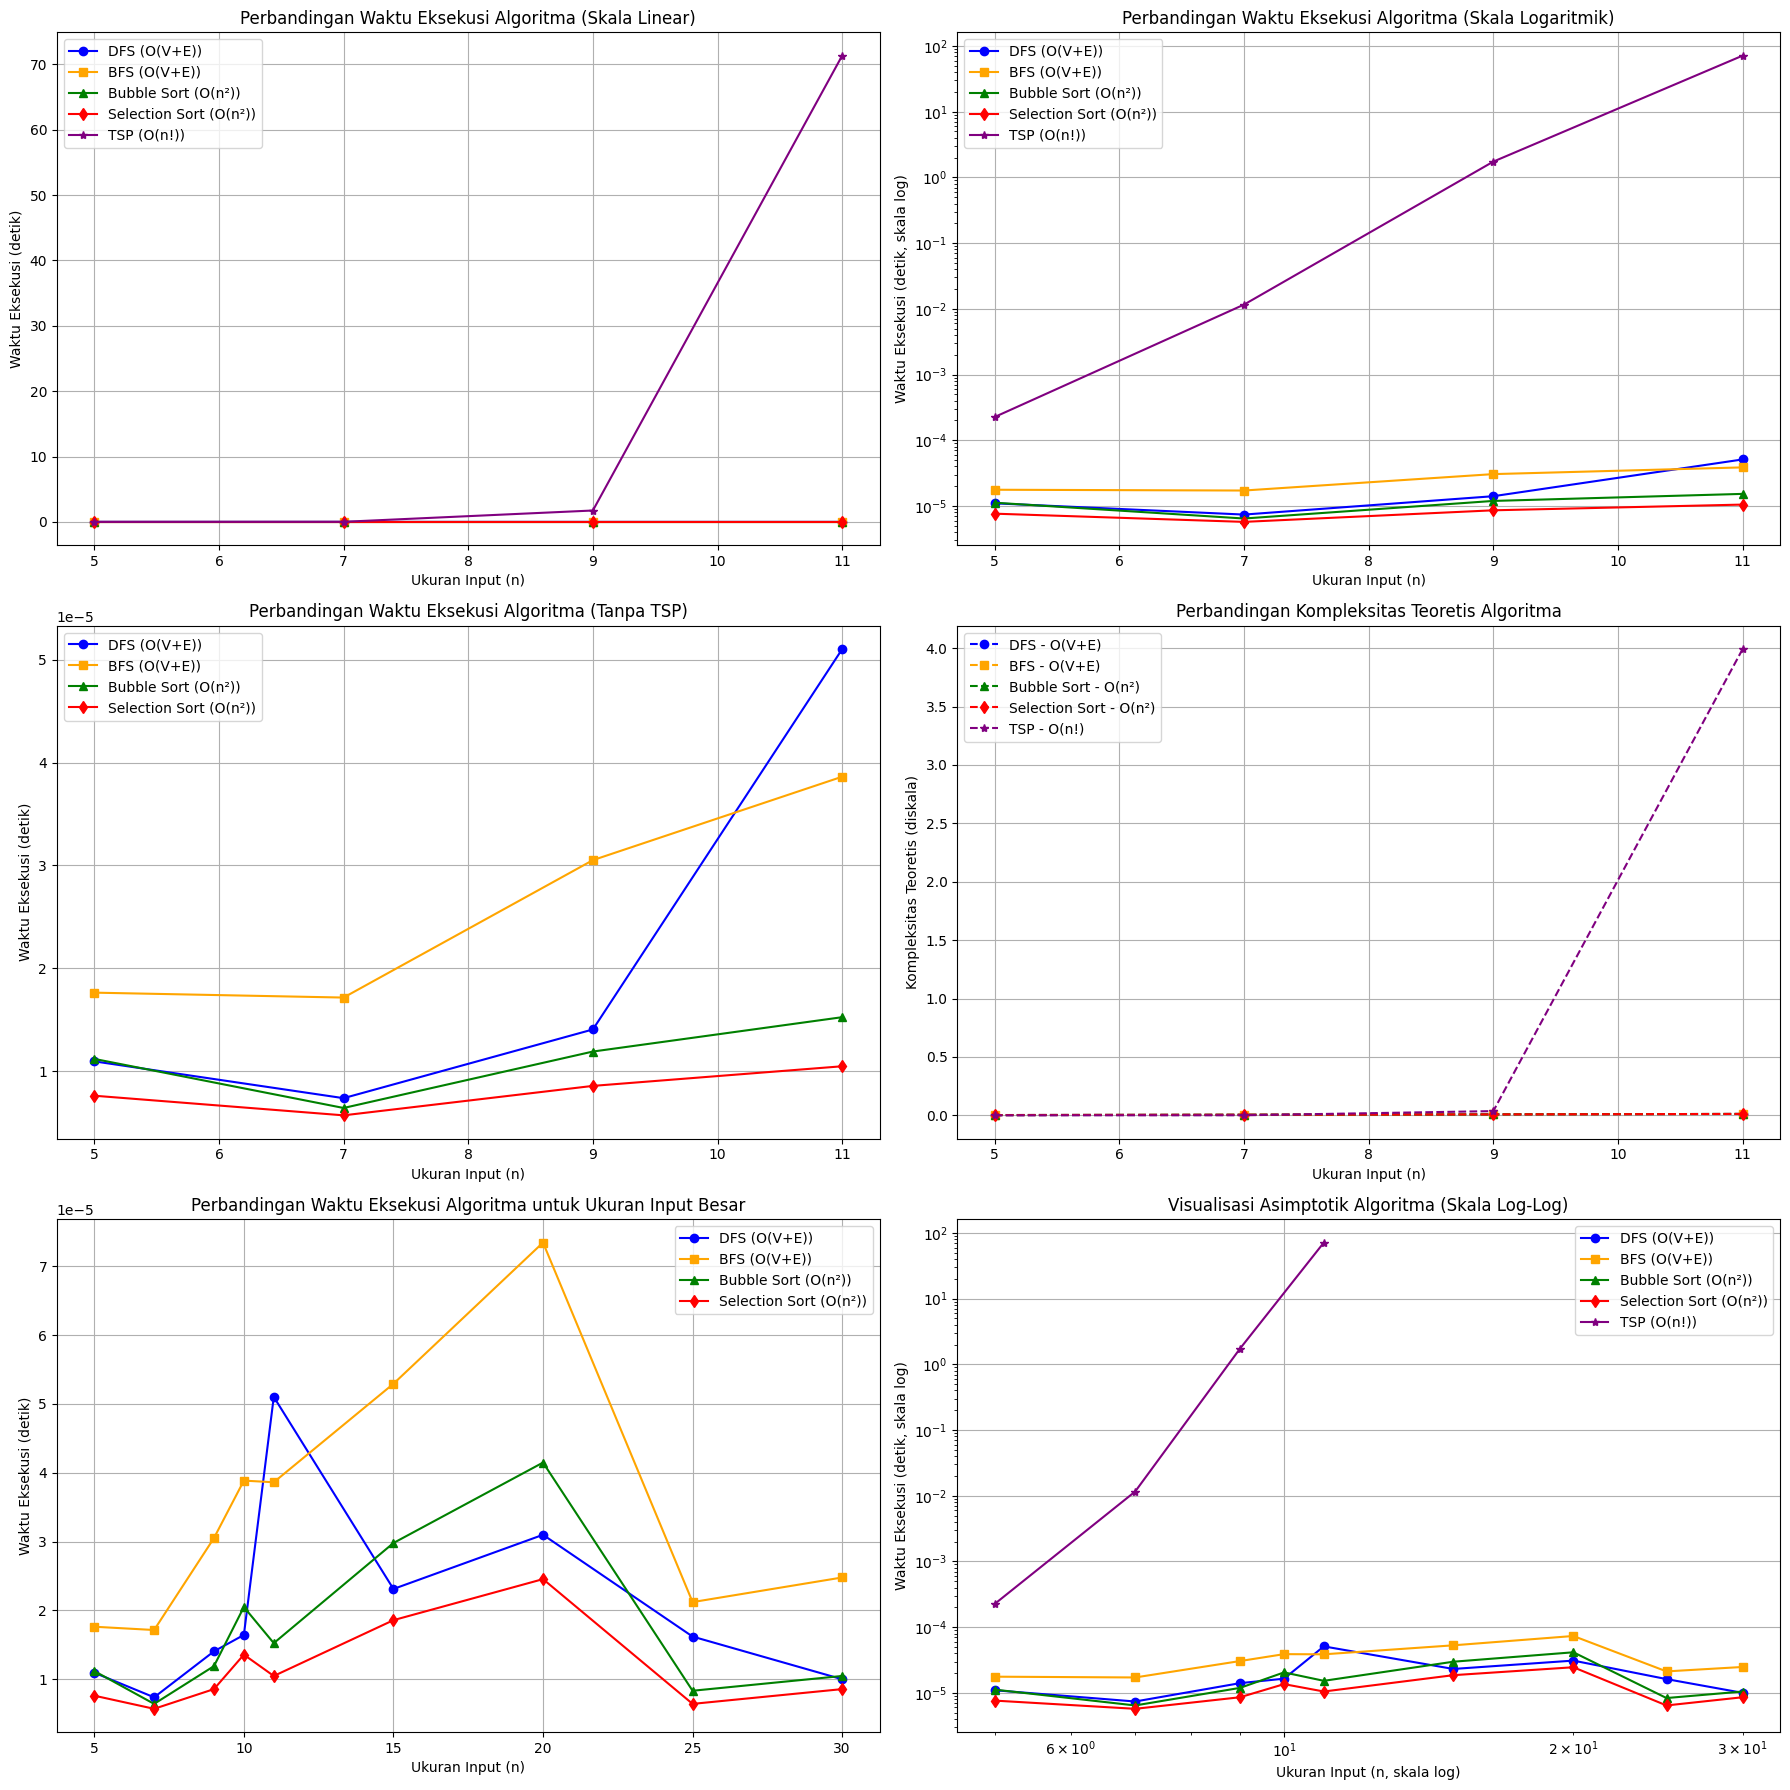

======================= PERBANDINGAN EFISIENSI ALGORITMA =======================

Perbandingan Kompleksitas Waktu:
1. DFS           : O(V + E) ~ O(n²) untuk graf lengkap
2. BFS           : O(V + E) ~ O(n²) untuk graf lengkap
3. Bubble Sort   : O(n²), O(n) dalam kasus terbaik dengan optimasi
4. Selection Sort: O(n²) dalam semua kasus
5. TSP Brute Force: O(n!)

Hasil Pengukuran Waktu Eksekusi:

n     DFS (detik)     BFS (detik)     Bubble Sort (detik) Selection Sort (detik) TSP (detik)    
--------------------------------------------------------------------------------
5     0.00001097      0.00001764      0.00001121      0.00000763      0.00022602     
7     0.00000739      0.00001717      0.00000644      0.00000572      0.01159930     
9     0.00001407      0.00003052      0.00001192      0.00000858      1.73985291     
11    0.00005102      0.00003862      0.00001526      0.00001049      71.33170962    

Hasil Pengukuran untuk Ukuran Input Besar (tanpa TSP):

n     DFS (detik)     BFS

In [ ]:

# ---------- Algoritma DFS ----------
def dfs(graph, start, visited=None):
    """
    Depth-First Search
    Kompleksitas Waktu: O(V + E) dimana V adalah jumlah vertex dan E adalah jumlah edge
    """
    if visited is None:
        visited = set()
    visited.add(start)
    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)
    return visited

# ---------- Algoritma BFS ----------
def bfs(graph, start):
    """
    Breadth-First Search
    Kompleksitas Waktu: O(V + E) dimana V adalah jumlah vertex dan E adalah jumlah edge
    """
    visited = set()
    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            queue.extend([n for n in graph[node] if n not in visited])
    return visited

# ---------- Bubble Sort ----------
def bubble_sort(arr):
    """
    Bubble Sort
    Kompleksitas Waktu:
    - Kasus Terburuk: O(n²)
    - Kasus Rata-rata: O(n²)
    - Kasus Terbaik: O(n) dengan optimasi flag
    """
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break

# ---------- Selection Sort ----------
def selection_sort(arr):
    """
    Selection Sort
    Kompleksitas Waktu: O(n²) untuk semua kasus (terbaik, rata-rata, terburuk)
    """
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

# ---------- TSP Brute Force ----------
def tsp_brute_force(graph):
    """
    Traveling Salesman Problem dengan Brute Force
    Kompleksitas Waktu: O(n!) dimana n adalah jumlah vertex
    """
    vertices = list(graph.keys())
    min_path = float('inf')
    for perm in itertools.permutations(vertices):
        current_cost = 0
        for i in range(len(perm) - 1):
            current_cost += graph[perm[i]][perm[i + 1]]
        current_cost += graph[perm[-1]][perm[0]]
        min_path = min(min_path, current_cost)
    return min_path

# ---------- Inisialisasi ----------
# Menggunakan ukuran input yang lebih bervariasi
input_sizes = [5, 7, 9, 11]  # Tambahkan ukuran input yang lebih besar (tapi jangan terlalu besar untuk TSP)

# Untuk ukuran input yang lebih besar (hanya untuk algoritma yang efisien)
input_sizes_extended = [5, 10, 15, 20, 25, 30]

# Definisi struktur data untuk menyimpan hasil
algorithms = ["DFS", "BFS", "Bubble Sort", "Selection Sort", "TSP"]
complexities = ["O(V+E)", "O(V+E)", "O(n²)", "O(n²)", "O(n!)"]
colors = ["blue", "orange", "green", "red", "purple"]
markers = ["o", "s", "^", "d", "*"]

# Untuk menyimpan waktu eksekusi
waktu_eksekusi = {alg: [] for alg in algorithms}
waktu_eksekusi_extended = {alg: [] for alg in algorithms[:4]}  # Tanpa TSP

# Untuk menyimpan kompleksitas teoretis
complexity_values = {alg: [] for alg in algorithms}
complexity_values_extended = {alg: [] for alg in algorithms[:4]}  # Tanpa TSP

# ---------- Pengukuran untuk ukuran input normal ----------
for n in input_sizes:
    print(f"Mengukur algoritma untuk ukuran input n = {n}...")

    # Data untuk Sort
    data = [random.randint(0, 1000) for _ in range(n)]

    # Graph untuk DFS dan BFS
    graph = {i: [j for j in range(n) if j != i] for i in range(n)}

    # Graph untuk TSP
    tsp_graph = {
        i: {j: random.randint(1, 100) for j in range(n) if j != i}
        for i in range(n)
    }

    # DFS
    start = time.time()
    dfs(graph, 0)
    end = time.time()
    waktu_eksekusi["DFS"].append(end - start)
    complexity_values["DFS"].append(n * n / 10000)  # O(n²) untuk graf lengkap

    # BFS
    start = time.time()
    bfs(graph, 0)
    end = time.time()
    waktu_eksekusi["BFS"].append(end - start)
    complexity_values["BFS"].append(n * n / 10000)  # O(n²) untuk graf lengkap

    # Bubble Sort
    temp_data = data.copy()
    start = time.time()
    bubble_sort(temp_data)
    end = time.time()
    waktu_eksekusi["Bubble Sort"].append(end - start)
    complexity_values["Bubble Sort"].append(n * n / 10000)  # O(n²)

    # Selection Sort
    temp_data = data.copy()
    start = time.time()
    selection_sort(temp_data)
    end = time.time()
    waktu_eksekusi["Selection Sort"].append(end - start)
    complexity_values["Selection Sort"].append(n * n / 10000)  # O(n²)

    # TSP
    start = time.time()
    tsp_brute_force(tsp_graph)
    end = time.time()
    waktu_eksekusi["TSP"].append(end - start)
    # Hitung n! untuk setiap ukuran input
    factorial = 1
    for i in range(1, n + 1):
        factorial *= i
    complexity_values["TSP"].append(factorial / 10000000)  # O(n!)

# ---------- Pengukuran untuk ukuran input yang lebih besar (tanpa TSP) ----------
for n in input_sizes_extended:
    if n in input_sizes:  # Jika sudah diukur sebelumnya, lewati
        continue

    print(f"Mengukur algoritma untuk ukuran input besar n = {n}...")

    # Data untuk Sort
    data = [random.randint(0, 1000) for _ in range(n)]

    # Graph untuk DFS dan BFS
    graph = {i: [j for j in range(n) if j != i] for i in range(n)}

    # DFS
    start = time.time()
    dfs(graph, 0)
    end = time.time()
    waktu_eksekusi_extended["DFS"].append(end - start)
    complexity_values_extended["DFS"].append(n * n / 10000)  # O(n²) untuk graf lengkap

    # BFS
    start = time.time()
    bfs(graph, 0)
    end = time.time()
    waktu_eksekusi_extended["BFS"].append(end - start)
    complexity_values_extended["BFS"].append(n * n / 10000)  # O(n²) untuk graf lengkap

    # Bubble Sort
    temp_data = data.copy()
    start = time.time()
    bubble_sort(temp_data)
    end = time.time()
    waktu_eksekusi_extended["Bubble Sort"].append(end - start)
    complexity_values_extended["Bubble Sort"].append(n * n / 10000)  # O(n²)

    # Selection Sort
    temp_data = data.copy()
    start = time.time()
    selection_sort(temp_data)
    end = time.time()
    waktu_eksekusi_extended["Selection Sort"].append(end - start)
    complexity_values_extended["Selection Sort"].append(n * n / 10000)  # O(n²)

# ---------- Visualisasi ----------
plt.figure(figsize=(18, 18))

# 1. Grafik Waktu Eksekusi dengan Skala Linear
plt.subplot(3, 2, 1)
for i, alg in enumerate(algorithms):
    plt.plot(input_sizes, waktu_eksekusi[alg], color=colors[i], marker=markers[i], label=f"{alg} ({complexities[i]})")

plt.xlabel('Ukuran Input (n)')
plt.ylabel('Waktu Eksekusi (detik)')
plt.title('Perbandingan Waktu Eksekusi Algoritma (Skala Linear)')
plt.legend()
plt.grid(True)

# 2. Grafik Waktu Eksekusi dengan Skala Log (memperlihatkan perbedaan untuk nilai kecil)
plt.subplot(3, 2, 2)
for i, alg in enumerate(algorithms):
    plt.semilogy(input_sizes, waktu_eksekusi[alg], color=colors[i], marker=markers[i], label=f"{alg} ({complexities[i]})")

plt.xlabel('Ukuran Input (n)')
plt.ylabel('Waktu Eksekusi (detik, skala log)')
plt.title('Perbandingan Waktu Eksekusi Algoritma (Skala Logaritmik)')
plt.legend()
plt.grid(True)

# 3. Grafik Waktu Eksekusi tanpa TSP (fokus pada algoritma lainnya)
plt.subplot(3, 2, 3)
for i, alg in enumerate(algorithms[:-1]):  # Semua kecuali TSP
    plt.plot(input_sizes, waktu_eksekusi[alg], color=colors[i], marker=markers[i], label=f"{alg} ({complexities[i]})")

plt.xlabel('Ukuran Input (n)')
plt.ylabel('Waktu Eksekusi (detik)')
plt.title('Perbandingan Waktu Eksekusi Algoritma (Tanpa TSP)')
plt.legend()
plt.grid(True)

# 4. Grafik Kompleksitas Teoretis
plt.subplot(3, 2, 4)
for i, alg in enumerate(algorithms):
    plt.plot(input_sizes, complexity_values[alg], color=colors[i], marker=markers[i], linestyle='--',
            label=f"{alg} - {complexities[i]}")

plt.xlabel('Ukuran Input (n)')
plt.ylabel('Kompleksitas Teoretis (diskala)')
plt.title('Perbandingan Kompleksitas Teoretis Algoritma')
plt.legend()
plt.grid(True)

# 5. Grafik untuk ukuran input yang lebih besar (tanpa TSP)
plt.subplot(3, 2, 5)
# Gabungkan data dari kedua pengukuran
x_extended = input_sizes.copy()
for n in input_sizes_extended:
    if n not in x_extended:
        x_extended.append(n)
x_extended.sort()

for i, alg in enumerate(algorithms[:-1]):  # Semua kecuali TSP
    y_values = []
    for n in x_extended:
        if n in input_sizes:
            idx = input_sizes.index(n)
            y_values.append(waktu_eksekusi[alg][idx])
        else:
            idx = input_sizes_extended.index(n)
            y_values.append(waktu_eksekusi_extended[alg][idx - len(input_sizes)])

    plt.plot(x_extended, y_values, color=colors[i], marker=markers[i], label=f"{alg} ({complexities[i]})")

plt.xlabel('Ukuran Input (n)')
plt.ylabel('Waktu Eksekusi (detik)')
plt.title('Perbandingan Waktu Eksekusi Algoritma untuk Ukuran Input Besar')
plt.legend()
plt.grid(True)

# 6. Visualisasi asimptotik semua algoritma (skala log-log)
plt.subplot(3, 2, 6)
for i, alg in enumerate(algorithms):
    if alg == "TSP":
        # Untuk TSP, hanya gunakan data asli
        plt.loglog(input_sizes, waktu_eksekusi[alg], color=colors[i], marker=markers[i], label=f"{alg} ({complexities[i]})")
    else:
        # Untuk algoritma lain, gabungkan data
        y_values = []
        for n in x_extended:
            if n in input_sizes:
                idx = input_sizes.index(n)
                y_values.append(waktu_eksekusi[alg][idx])
            else:
                idx = input_sizes_extended.index(n)
                y_values.append(waktu_eksekusi_extended[alg][idx - len(input_sizes)])

        plt.loglog(x_extended, y_values, color=colors[i], marker=markers[i], label=f"{alg} ({complexities[i]})")

plt.xlabel('Ukuran Input (n, skala log)')
plt.ylabel('Waktu Eksekusi (detik, skala log)')
plt.title('Visualisasi Asimptotik Algoritma (Skala Log-Log)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('perbandingan_algoritma_diperbaiki.png', dpi=300)
plt.show()

# ---------- Tabel Hasil ----------
print("======================= PERBANDINGAN EFISIENSI ALGORITMA =======================")
print("\nPerbandingan Kompleksitas Waktu:")
print("1. DFS           : O(V + E) ~ O(n²) untuk graf lengkap")
print("2. BFS           : O(V + E) ~ O(n²) untuk graf lengkap")
print("3. Bubble Sort   : O(n²), O(n) dalam kasus terbaik dengan optimasi")
print("4. Selection Sort: O(n²) dalam semua kasus")
print("5. TSP Brute Force: O(n!)")

print("\nHasil Pengukuran Waktu Eksekusi:")
print("\n{:<5} {:<15} {:<15} {:<15} {:<15} {:<15}".format(
    "n", "DFS (detik)", "BFS (detik)", "Bubble Sort (detik)", "Selection Sort (detik)", "TSP (detik)"))
print("-" * 80)

for i, n in enumerate(input_sizes):
    print("{:<5} {:<15.8f} {:<15.8f} {:<15.8f} {:<15.8f} {:<15.8f}".format(
        n,
        waktu_eksekusi["DFS"][i],
        waktu_eksekusi["BFS"][i],
        waktu_eksekusi["Bubble Sort"][i],
        waktu_eksekusi["Selection Sort"][i],
        waktu_eksekusi["TSP"][i]
    ))

print("\nHasil Pengukuran untuk Ukuran Input Besar (tanpa TSP):")
print("\n{:<5} {:<15} {:<15} {:<15} {:<15}".format(
    "n", "DFS (detik)", "BFS (detik)", "Bubble Sort (detik)", "Selection Sort (detik)"))
print("-" * 75)

for i, n in enumerate(input_sizes_extended):
    if n not in input_sizes:  # Hanya tampilkan yang belum ditampilkan
        idx = i - len(input_sizes)
        print("{:<5} {:<15.8f} {:<15.8f} {:<15.8f} {:<15.8f}".format(
            n,
            waktu_eksekusi_extended["DFS"][idx],
            waktu_eksekusi_extended["BFS"][idx],
            waktu_eksekusi_extended["Bubble Sort"][idx],
            waktu_eksekusi_extended["Selection Sort"][idx]
        ))

print("\nAnalisis dan Kesimpulan:")
print("1. Algoritma DFS dan BFS menunjukkan kinerja yang baik untuk grafik lengkap, dengan kompleksitas O(n²).")
print("2. Bubble Sort dan Selection Sort juga memiliki kompleksitas O(n²), tetapi dengan konstanta yang berbeda, yang menyebabkan perbedaan dalam waktu eksekusi.")
print("3. TSP dengan pendekatan Brute Force memiliki kompleksitas O(n!), yang meningkat dengan sangat cepat.")
print("   - Untuk n=5: TSP masih cepat")
print("   - Untuk n=9: TSP sudah menunjukkan peningkatan waktu yang signifikan")
print("   - Untuk n>11: TSP menjadi sangat tidak efisien dan membutuhkan waktu yang sangat lama")
print("4. Untuk graf lengkap, kompleksitas DFS dan BFS menjadi O(n²) karena E = n(n-1)/2 ~ O(n²)")
print("5. Untuk aplikasi praktis dengan ukuran data yang besar, algoritma dengan kompleksitas O(n!) seperti TSP Brute Force tidak direkomendasikan.")